<ipython-input-7-c62c1273ec57>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Axes3DSubplot:>

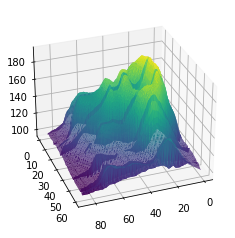

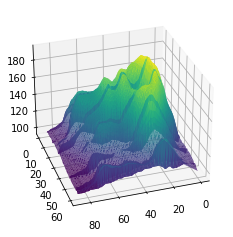

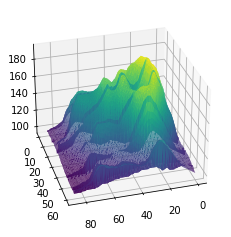

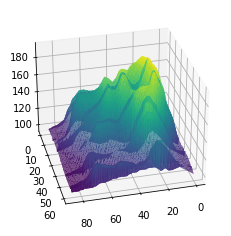

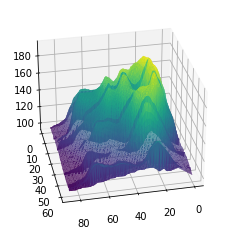

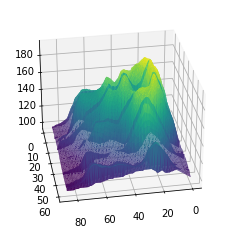

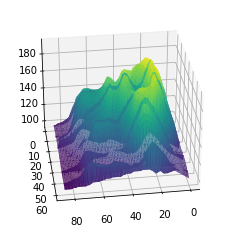

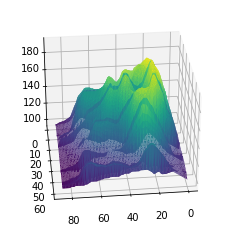

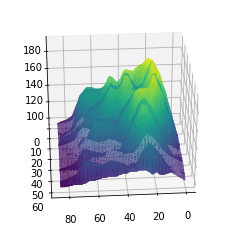

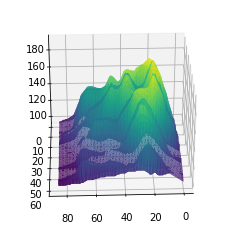

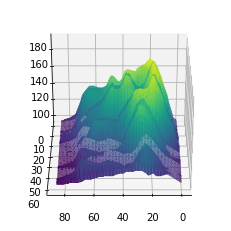

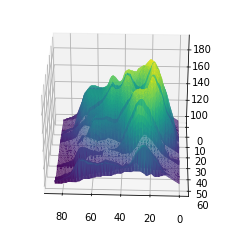

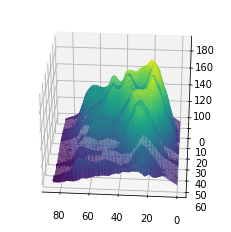

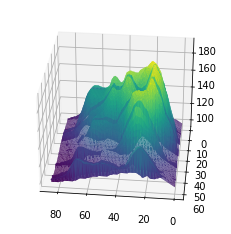

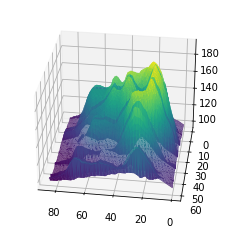

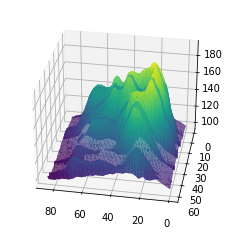

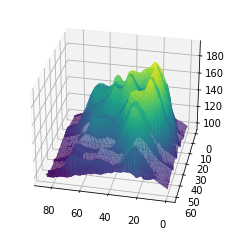

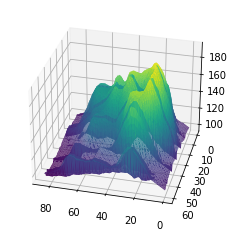

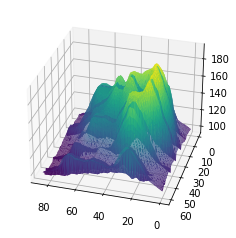

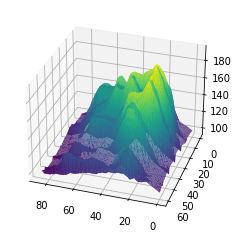

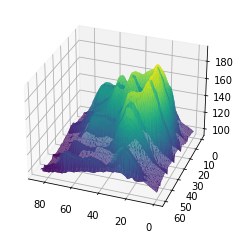

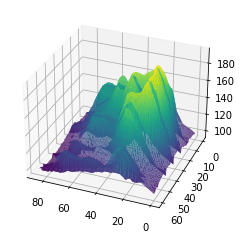

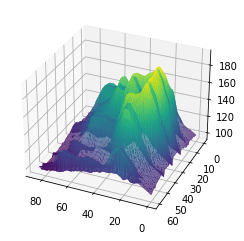

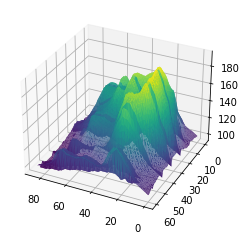

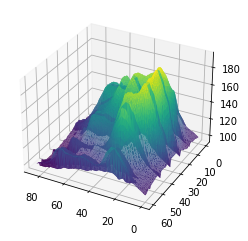

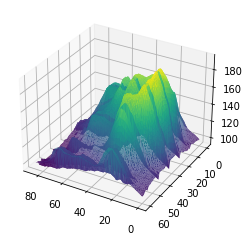

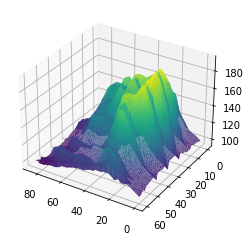

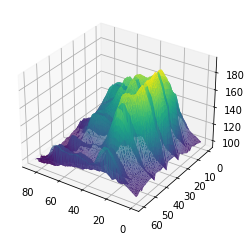

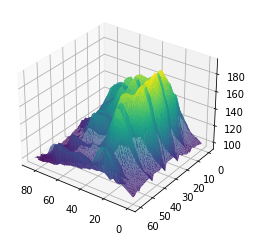

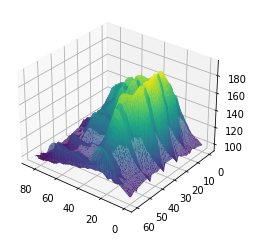

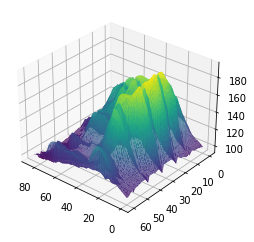

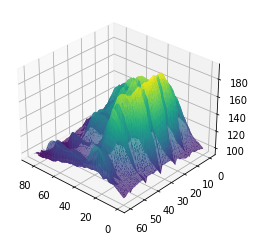

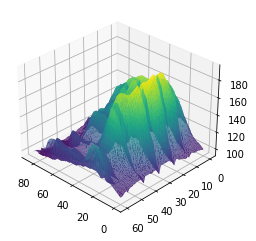

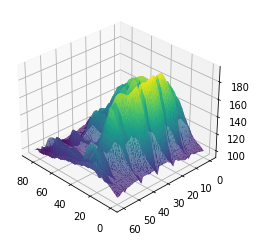

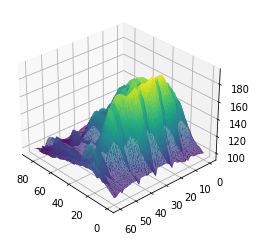

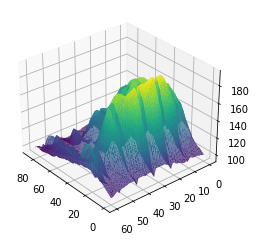

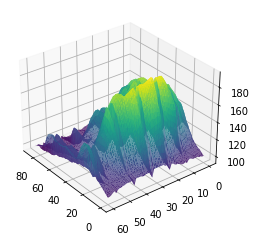

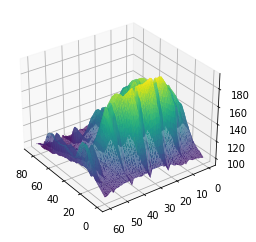

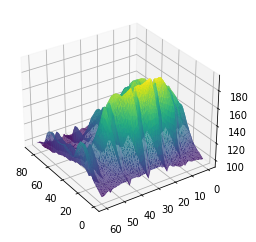

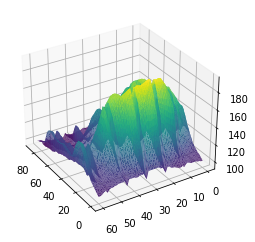

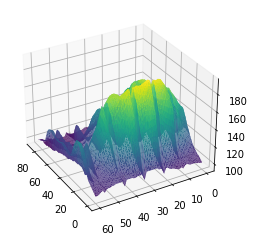

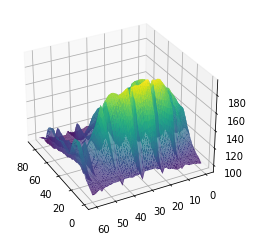

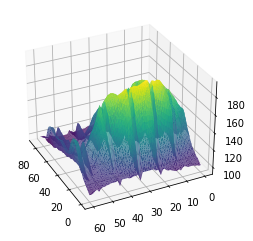

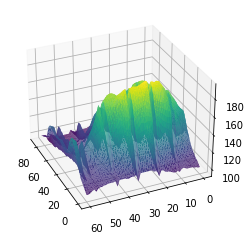

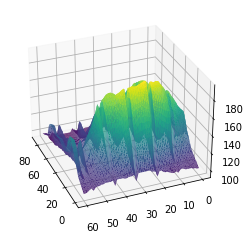

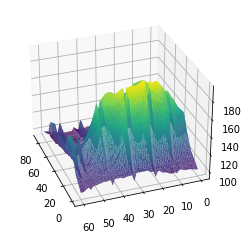

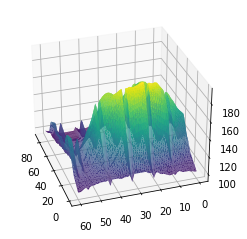

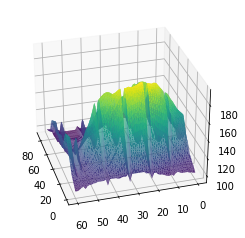

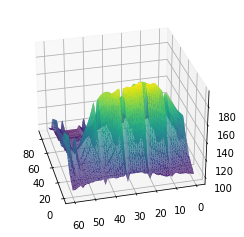

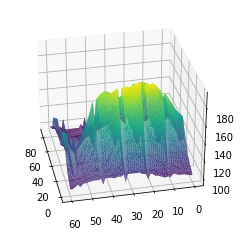

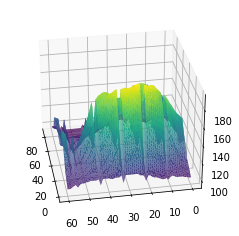

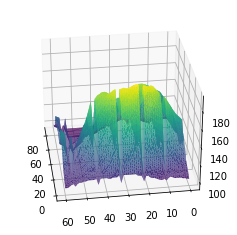

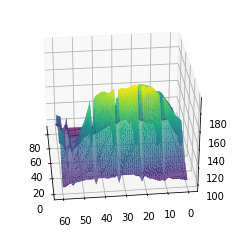

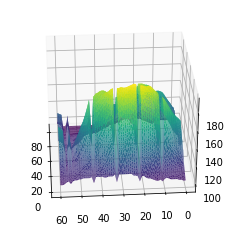

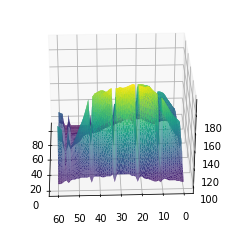

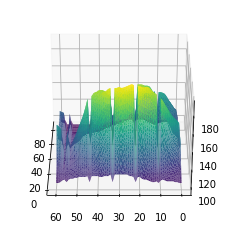

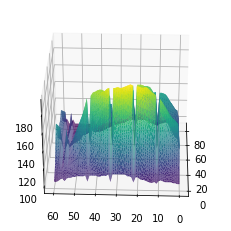

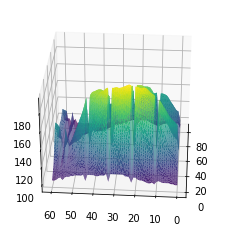

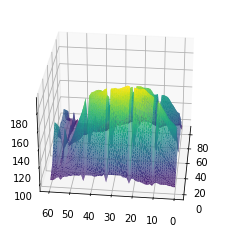

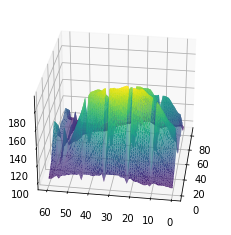

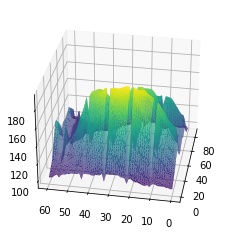

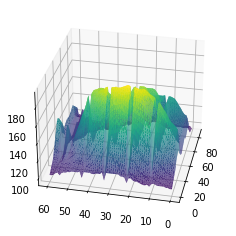

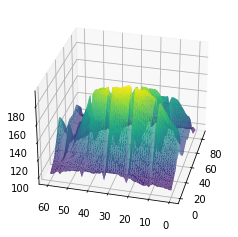

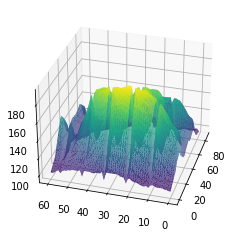

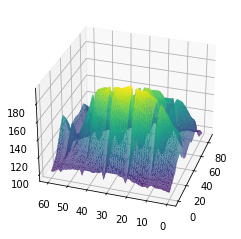

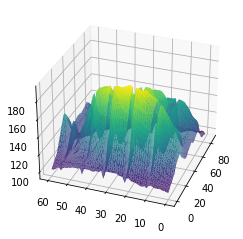

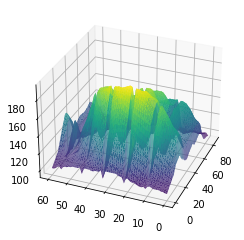

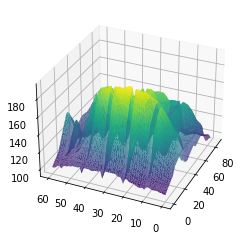

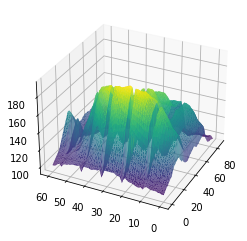

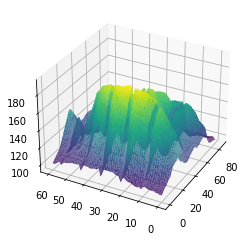

In [7]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):
 
    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    # Set the angle of the camera
    ax.view_init(30,angle)
 
    # Save it
filename='Volcano_step'+str(angle)+'.png'
plt.savefig(filename, dpi=96)
plt.gca()


In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

Global minima found [-1.30641113]
Local minimum found 3.8374671194983834
First root found [0.]
Second root found [-2.47948183]


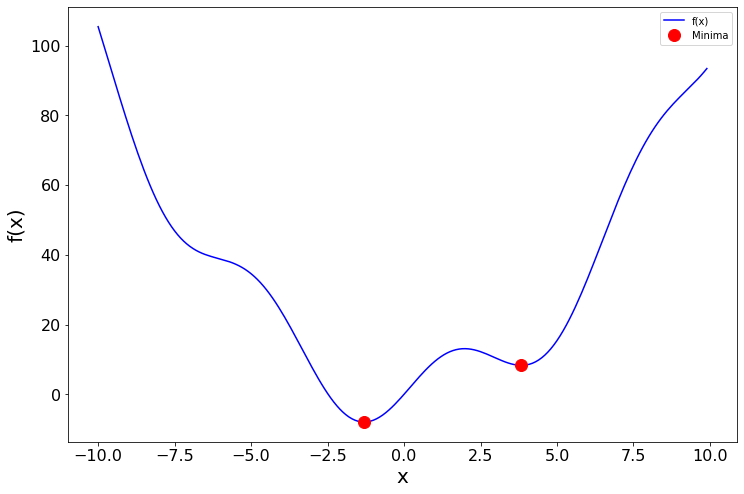

In [22]:
import numpy as np

x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)

from scipy import optimize

# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)

# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s" % xmin_local)


root = optimize.root(f, 1)  # our initial guess is 1
print("First root found %s" % root.x)
root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'ro', label="Minima", markersize=12)

# Plot the roots
# roots = np.array([root.x, root2.x])
# ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
# ax.axhline(0, color='gray')
plt.savefig("minimums.png", bbox_inches='tight')
plt.show()